In [2]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# `np.tile` vs. `np.repeat`

In [3]:
np.tile([1, 2, 3], reps=2)

array([1, 2, 3, 1, 2, 3])

In [4]:
np.repeat([1, 2, 3], 2)

array([1, 1, 2, 2, 3, 3])

### multidimensional

In [5]:
np.tile(np.repeat([1, 2, 3, 4], 2), 3)

array([1, 1, 2, 2, 3, 3, 4, 4, 1, 1, 2, 2, 3, 3, 4, 4, 1, 1, 2, 2, 3, 3,
       4, 4])

In [6]:
d = {'b': 12}
dict({'a': 2}, **d)

{'a': 2, 'b': 12}

In [7]:
a = np.arange(4).reshape(2, -1)
np.tile(a, (2, 3))

array([[0, 1, 0, 1, 0, 1],
       [2, 3, 2, 3, 2, 3],
       [0, 1, 0, 1, 0, 1],
       [2, 3, 2, 3, 2, 3]])

In [8]:
a = np.arange(4).reshape(2, -1)
np.repeat(a, (2, 5), axis=0)

array([[0, 1],
       [0, 1],
       [2, 3],
       [2, 3],
       [2, 3],
       [2, 3],
       [2, 3]])

In [9]:
a = np.arange(4).reshape(2, -1)
np.repeat(a, (2, 5), axis=1)

array([[0, 0, 1, 1, 1, 1, 1],
       [2, 2, 3, 3, 3, 3, 3]])

# Set operations

In [8]:
a = np.array([1, 2, 3, 2, 3, 4, 3, 4, 5, 6])
b = np.array([7, 2, 10, 2, 7, 4, 9, 4, 9, 8])

np.intersect1d(a, b), np.setdiff1d(a, b)

(array([2, 4]), array([1, 3, 5, 6]))

# Matching positions and elements

In [10]:
a = np.array([1, 2, 3, 2, 3, 4, 3, 4, 5, 6])
b = np.array([7, 2, 10, 2, 7, 4, 9, 4, 9, 8])

np.where(a == b), a[a==b]

((array([1, 3, 5, 7]),), array([2, 2, 4, 4]))

# Boolean indexing

In [11]:
a[a > 4]

array([5, 6])

# Swapping columns

In [12]:
a = np.arange(10).reshape(2, -1)
a[:, [1, 2, 3, 0, 4]]

array([[1, 2, 3, 0, 4],
       [6, 7, 8, 5, 9]])

# Standardizing and normalizing

Standardizing: mean 0, std 1

In [14]:
a = np.random.uniform(size=(5, 4), low=-5, high=10)
a

array([[-3.19702299, -4.39333495, -1.53204329,  0.72289772],
       [-0.40812838,  5.40143473, -1.56224407, -4.21798973],
       [-1.14096402,  0.03148974, -0.83917139,  3.59503375],
       [-3.24885773,  2.92870466,  7.16298786,  8.79626708],
       [ 6.83303487, -3.86361143,  6.82926722,  5.54856272]])

In [15]:
(a - a.mean()) / a.std()

array([[-1.03524097, -1.31868688, -0.64075216, -0.10648198],
       [-0.37445951,  1.00201833, -0.64790772, -1.27714179],
       [-0.54809253, -0.27029942, -0.47658787,  0.57402213],
       [-1.04752234,  0.41614671,  1.41938859,  1.80636651],
       [ 1.3412118 , -1.19317784,  1.34031912,  1.03687782]])

Normalizing: squash into range [0, 1)

In [16]:
(a - a.min()) / a.ptp()

array([[0.09070114, 0.        , 0.21693541, 0.38789894],
       [0.3021476 , 0.74261298, 0.21464566, 0.0132942 ],
       [0.24658598, 0.33547826, 0.26946708, 0.60565654],
       [0.08677117, 0.55513727, 0.87616918, 1.        ],
       [0.85115304, 0.04016221, 0.85086738, 0.75376783]])

# `np.digitize`

In [17]:
a = np.arange(1, 11).reshape(2, -1)
a = np.array([20, -2, 3, 5, 8, 7])
np.digitize(a, bins=[1, 4, 8])

array([3, 0, 1, 2, 3, 2])

# Local peaks

In [18]:
a = np.array([1, 3, 7, 1, 2, 6, 0, 1])

diff1 = a - np.hstack((a[1:], 0))
diff2 = a - np.hstack((0, a[:-1]))
np.where((diff1>0) & (diff2>0))

(array([2, 5, 7]),)

In [19]:
a = np.array([[3,3,3],[4,4,4],[5,5,5]])
b = np.array([1,2,3])

a - b[:, None]

array([[2, 2, 2],
       [2, 2, 2],
       [2, 2, 2]])

In [20]:
x = np.array([1, 2, 1, 1, 3, 4, 3, 1, 1, 2, 1, 1, 2])

np.where(x == 1)[0][4]

8

# Date range

In [21]:
np.arange(np.datetime64("2018-01-02"), np.datetime64("2018-01-15"), 3)

array(['2018-01-02', '2018-01-05', '2018-01-08', '2018-01-11',
       '2018-01-14'], dtype='datetime64[D]')

# Strides

In [27]:
a = np.arange(15)
stride = 2
window = 4
np.array([a[i:i+window] for i in range(0, a.shape[0]-window+1, stride)])

array([[ 0,  1,  2,  3],
       [ 2,  3,  4,  5],
       [ 4,  5,  6,  7],
       [ 6,  7,  8,  9],
       [ 8,  9, 10, 11],
       [10, 11, 12, 13]])

## Trim digital signal

Trim each consecutive block of ones to `min(cut, len(block))`.

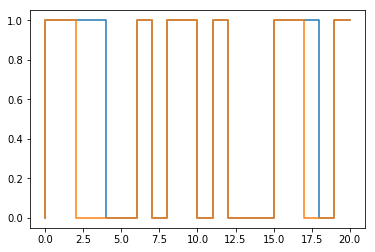

In [24]:
import itertools

x = [0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1]
plt.step(np.arange(len(x)), x)
cut = 2

x = np.array([0] + x + [0])
up = np.where(np.diff(x) == 1)[0] + 1
down = np.where(np.diff(x) == -1)[0] + 1
delta = down - up
delta[delta > cut] = cut
x[:] = 0
x[list(itertools.chain(*(list(range(up[i], up[i]+delta[i])) for i in range(delta.shape[0]))))] = 1
x = x[1:-1]
x
plt.step(np.arange(len(x)), x)

# Permutations

In [25]:
a = np.array([4, 3, 0, 10, 1])
order = np.argsort(-a)

a[order]
order, a[order][np.argsort(order)]

(array([3, 0, 1, 4, 2]), array([ 4,  3,  0, 10,  1]))

In [26]:
a = np.array([[1, -1, 2], [5, 0, 0]])
np.argmax(a, -1)
a.argmax(-1)

array([2, 0])

# argsort

In [33]:
a = np.array([3, -1, 2, 0, 5, 2])
order = np.argsort(-a)
a[order]

array([ 5,  3,  2,  2,  0, -1])

In [35]:
a[order][np.argsort(order)]

array([ 3, -1,  2,  0,  5,  2])

In [36]:
[1, 2] * -1

[]